# MEDICAL INSURANCE CHARGES PREDICTION

# By - Tanmay Sunil Dixit,  Roll no 5

Dataset link -> https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression/data

# Problem statement :- Which factor affects the charges of medical insurance

Factors that affects how much medical insurance premium cost

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [1]:
#LOADING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C://Users//Tanmay Dixit//Downloads//insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# EDA

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

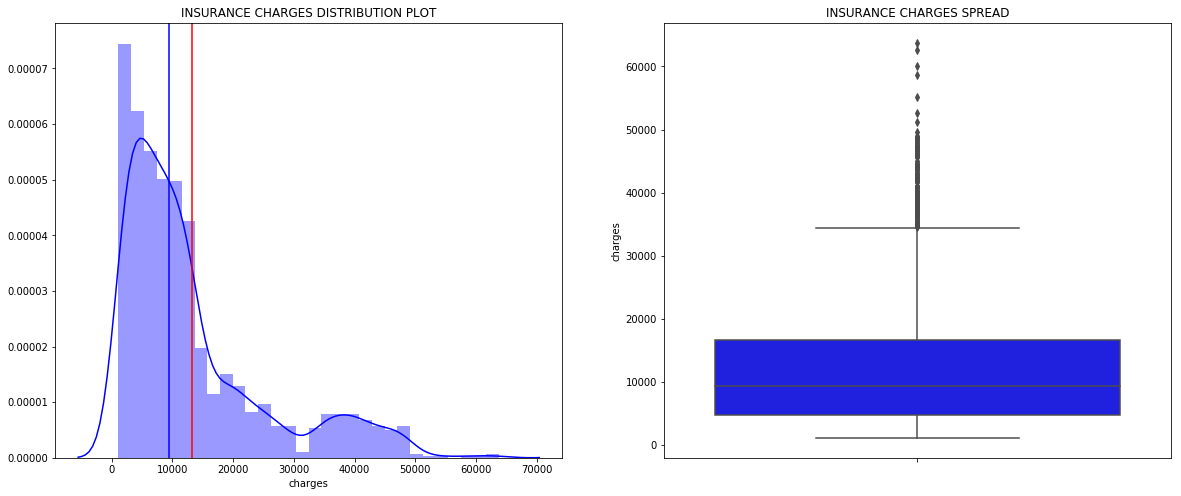

In [10]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('INSURANCE CHARGES DISTRIBUTION PLOT')
sns.distplot(df.charges, color='b')
plt.axvline(df.charges.mean(), color="r")
plt.axvline(df.charges.median(), color="b")

plt.subplot(1,2,2)
plt.title('INSURANCE CHARGES SPREAD')
sns.boxplot(y=df.charges, color='b')

plt.show()

In [11]:
df.charges.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
85%      24990.166996
90%      34831.719700
100%     63770.428010
max      63770.428010
Name: charges, dtype: float64

In [12]:
print('DIFFERNCE BETWEEN MEAN AND MEDIAN :',df.charges.mean()-df.charges.median())

DIFFERNCE BETWEEN MEAN AND MEDIAN : 3888.389265141257


1. The plot seemed to be right-skewed, meaning that the most charges in the dataset are low(Below 24,990).
2. There is a significant difference between the mean and the median of the chares distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the insurance charges.(85% of the prices are below 24,990 , whereas the remaining 15% are between 24,990 and 63,770 .)

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

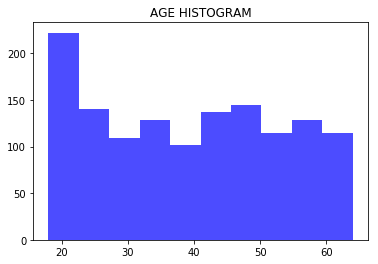

In [13]:
plt.title('AGE HISTOGRAM')
plt.hist(df['age'], bins=10, alpha=0.7, color='b')

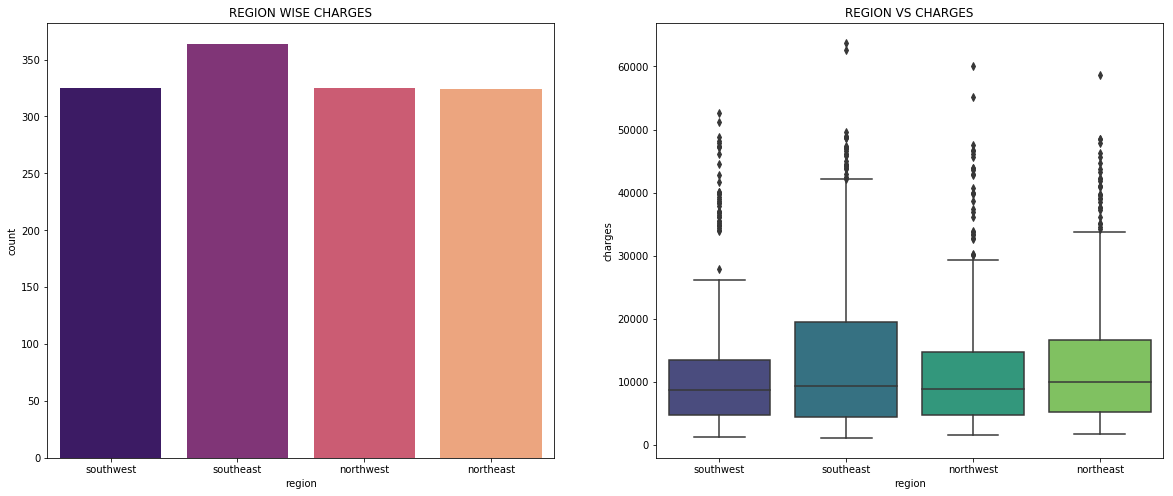

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('REGION WISE CHARGES')
sns.countplot(df.region, palette=("magma"))

plt.subplot(1,2,2)
plt.title('REGION VS CHARGES')
sns.boxplot(x=df.region, y=df.charges, palette=("viridis"))

plt.show()

In [ ]:
MAX Peoples are from southeast 
medical insurance of price 5000 to 20000

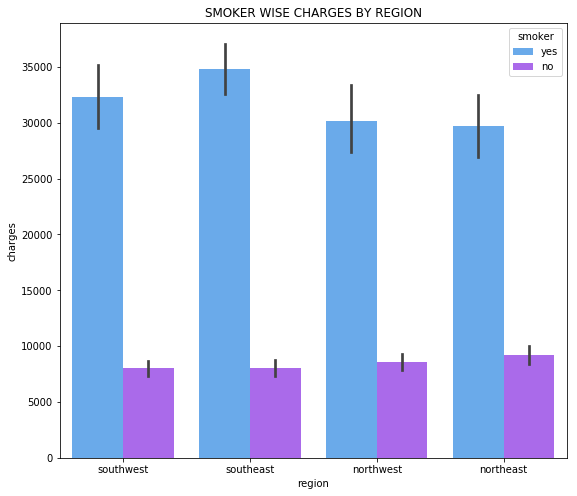

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('SMOKER WISE CHARGES BY REGION')
ax = sns.barplot(x='region', y='charges',hue='smoker', data=df, palette='cool')


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gender')]

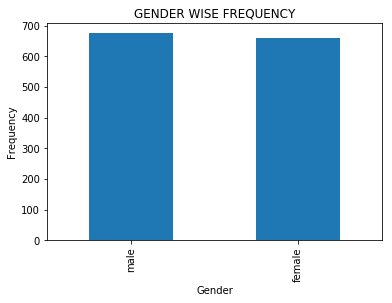

In [19]:
plt1 = df.sex.value_counts().plot(kind='bar')
plt.title("GENDER WISE FREQUENCY")
plt1.set(xlabel = 'Gender', ylabel='Frequency')

BOTH MALE AND FEMALES ARE APPROXIMATELY SAME 

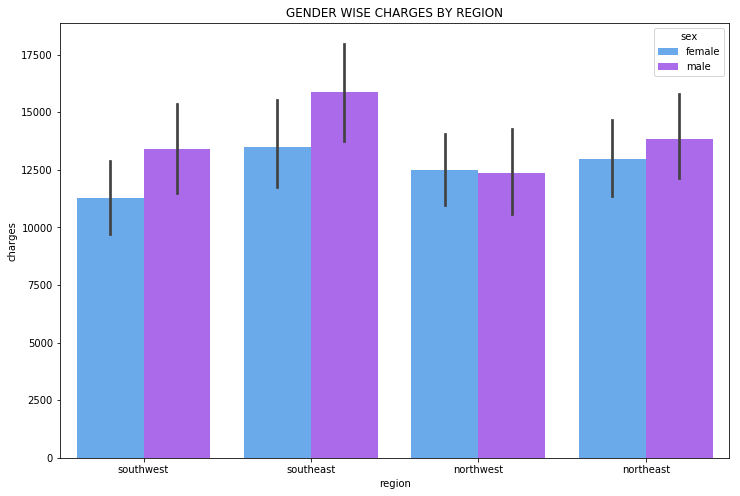

In [14]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.title('GENDER WISE CHARGES BY REGION')
ax = sns.barplot(x='region', y='charges',hue='sex', data=df, palette='cool')

Maximum peoples are from south east region. 
There are more peoples from south region than north region
In north region , maximum peoples are from northeast than northwest

By above fig, males pay more charges than female

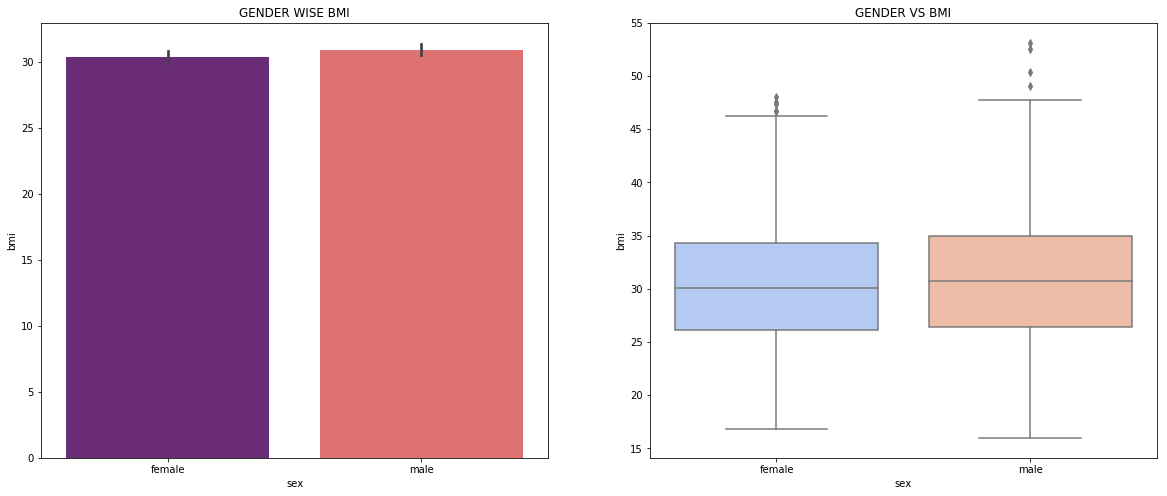

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('GENDER WISE BMI')
ax = sns.barplot(x='sex', y='bmi', data=df, palette='magma')

plt.subplot(1,2,2)
plt.title('GENDER VS BMI')
sns.boxplot(x=df.sex, y=df.bmi, palette=("coolwarm"))

plt.show()

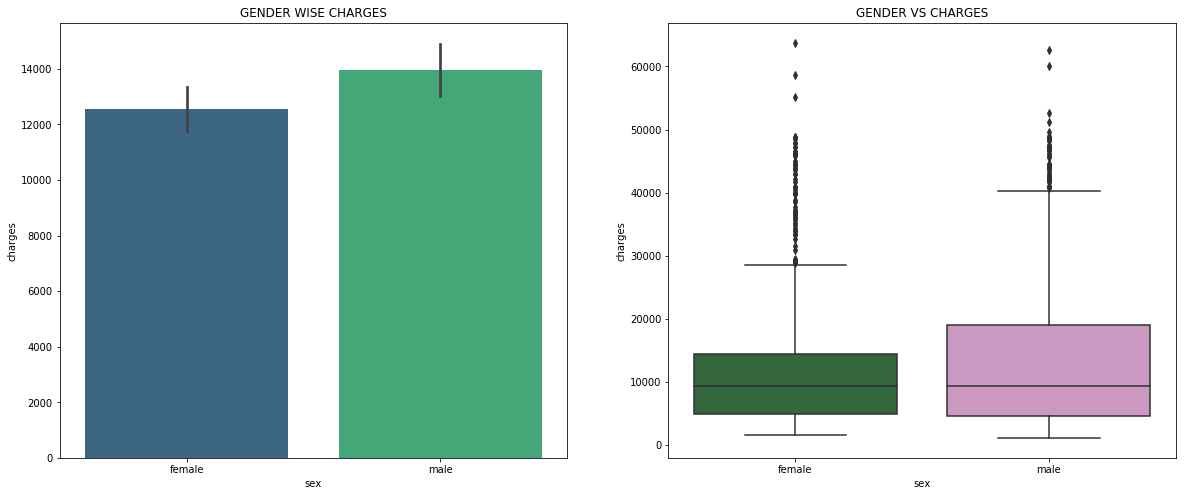

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('GENDER WISE CHARGES')
ax = sns.barplot(x='sex', y='charges', data=df, palette='viridis')

plt.subplot(1,2,2)
plt.title('GENDER VS CHARGES')
sns.boxplot(x=df.sex, y=df.charges, palette=("cubehelix"))

plt.show()

[Text(0, 0.5, 'Frequency of smokers'), Text(0.5, 0, 'smokers')]

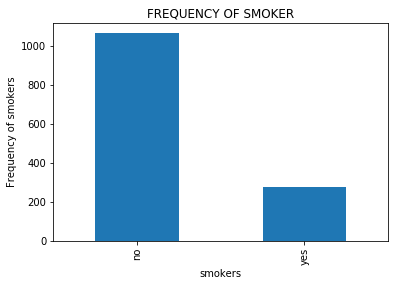

In [17]:
plt1 = df.smoker.value_counts().plot(kind='bar')
plt.title("FREQUENCY OF SMOKER")
plt1.set(xlabel = 'smokers', ylabel='Frequency of smokers')

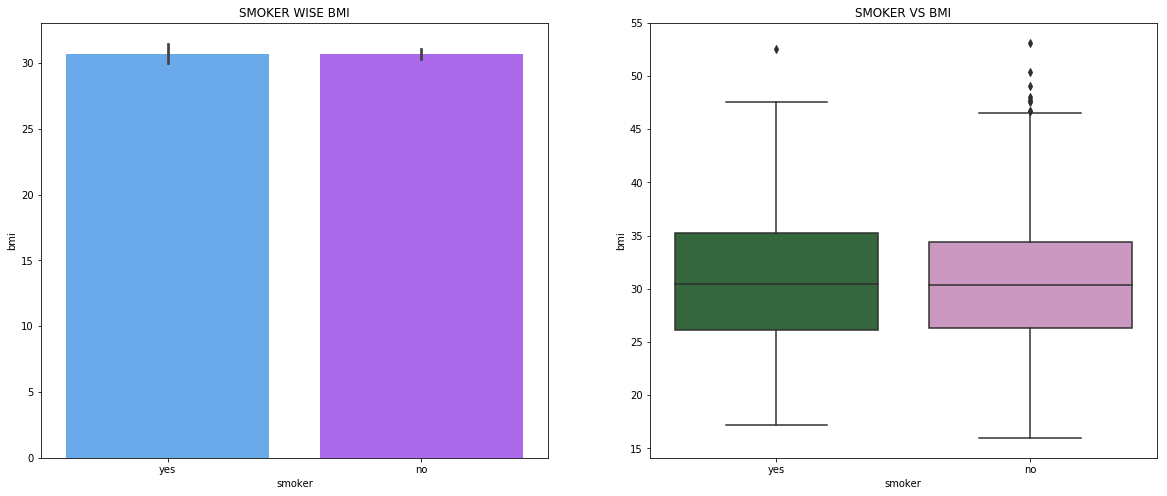

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('SMOKER WISE BMI')
ax = sns.barplot(x='smoker', y='bmi', data=df, palette='cool')

plt.subplot(1,2,2)
plt.title('SMOKER VS BMI')
sns.boxplot(x=df.smoker, y=df.bmi, palette=("cubehelix"))

plt.show()

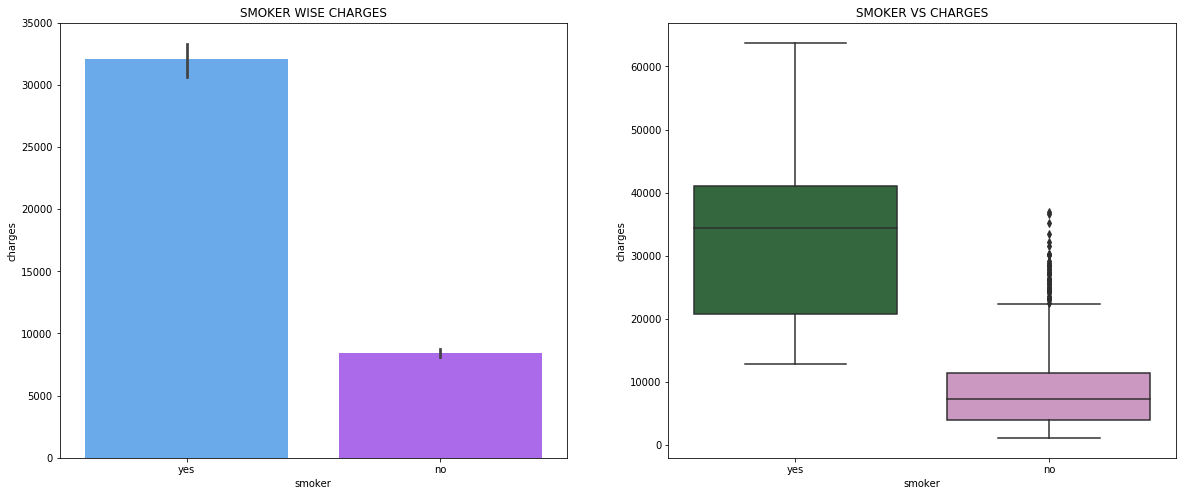

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('SMOKER WISE CHARGES')
ax = sns.barplot(x='smoker', y='charges', data=df, palette='cool')

plt.subplot(1,2,2)
plt.title('SMOKER VS CHARGES')
sns.boxplot(x=df.smoker, y=df.charges, palette=("cubehelix"))

plt.show()

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Children')]

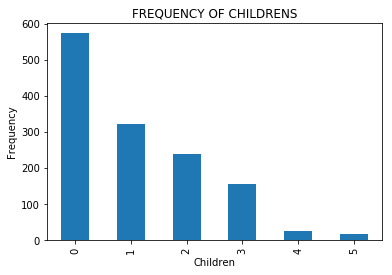

In [25]:
plt1 = df.children.value_counts().plot(kind='bar')
plt.title("FREQUENCY OF CHILDRENS")
plt1.set(xlabel = 'Children', ylabel='Frequency')

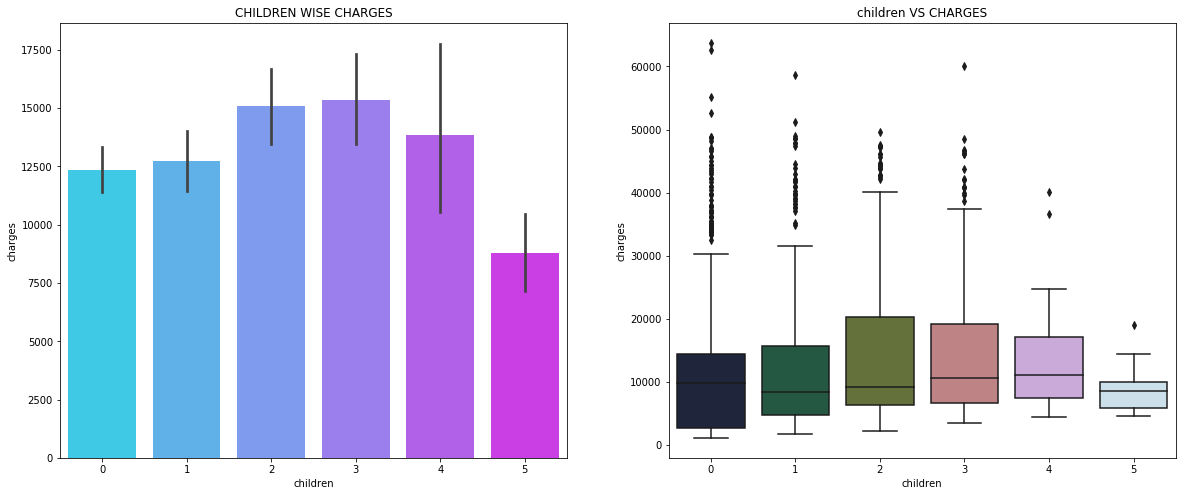

In [26]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('CHILDREN WISE CHARGES')
ax = sns.barplot(x='children', y='charges', data=df, palette='cool')

plt.subplot(1,2,2)
plt.title('children VS CHARGES')
sns.boxplot(x=df.children, y=df.charges, palette=("cubehelix"))

plt.show()

# PREPARING DATA (ONE HOT ENCODING / MIN MAX SCALAR)

In [33]:
catcols=list(df.select_dtypes(include=['object']).head())


In [34]:
df=pd.get_dummies(df, columns=catcols, drop_first=True)

df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [35]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [36]:
x=df.drop(['charges'], axis=1)
y=df['charges']
x.head(2)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,0,1,0,0,1
1,18,33.77,1,1,0,0,1,0


In [37]:
from sklearn.model_selection import train_test_split
xt,xte,yt,yte = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['age','bmi']
xt[num_vars] = scaler.fit_transform(xt[num_vars])
xte[num_vars] = scaler.transform(xte[num_vars])
xte.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
578,0.739130,0.383105,1,1,0,0,0,1
610,0.630435,0.360775,1,0,0,0,1,0
569,0.652174,0.661959,2,1,1,1,0,0
1034,0.934783,0.603175,0,1,0,1,0,0
198,0.717391,0.056228,0,0,0,1,0,0


In [39]:
xt.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

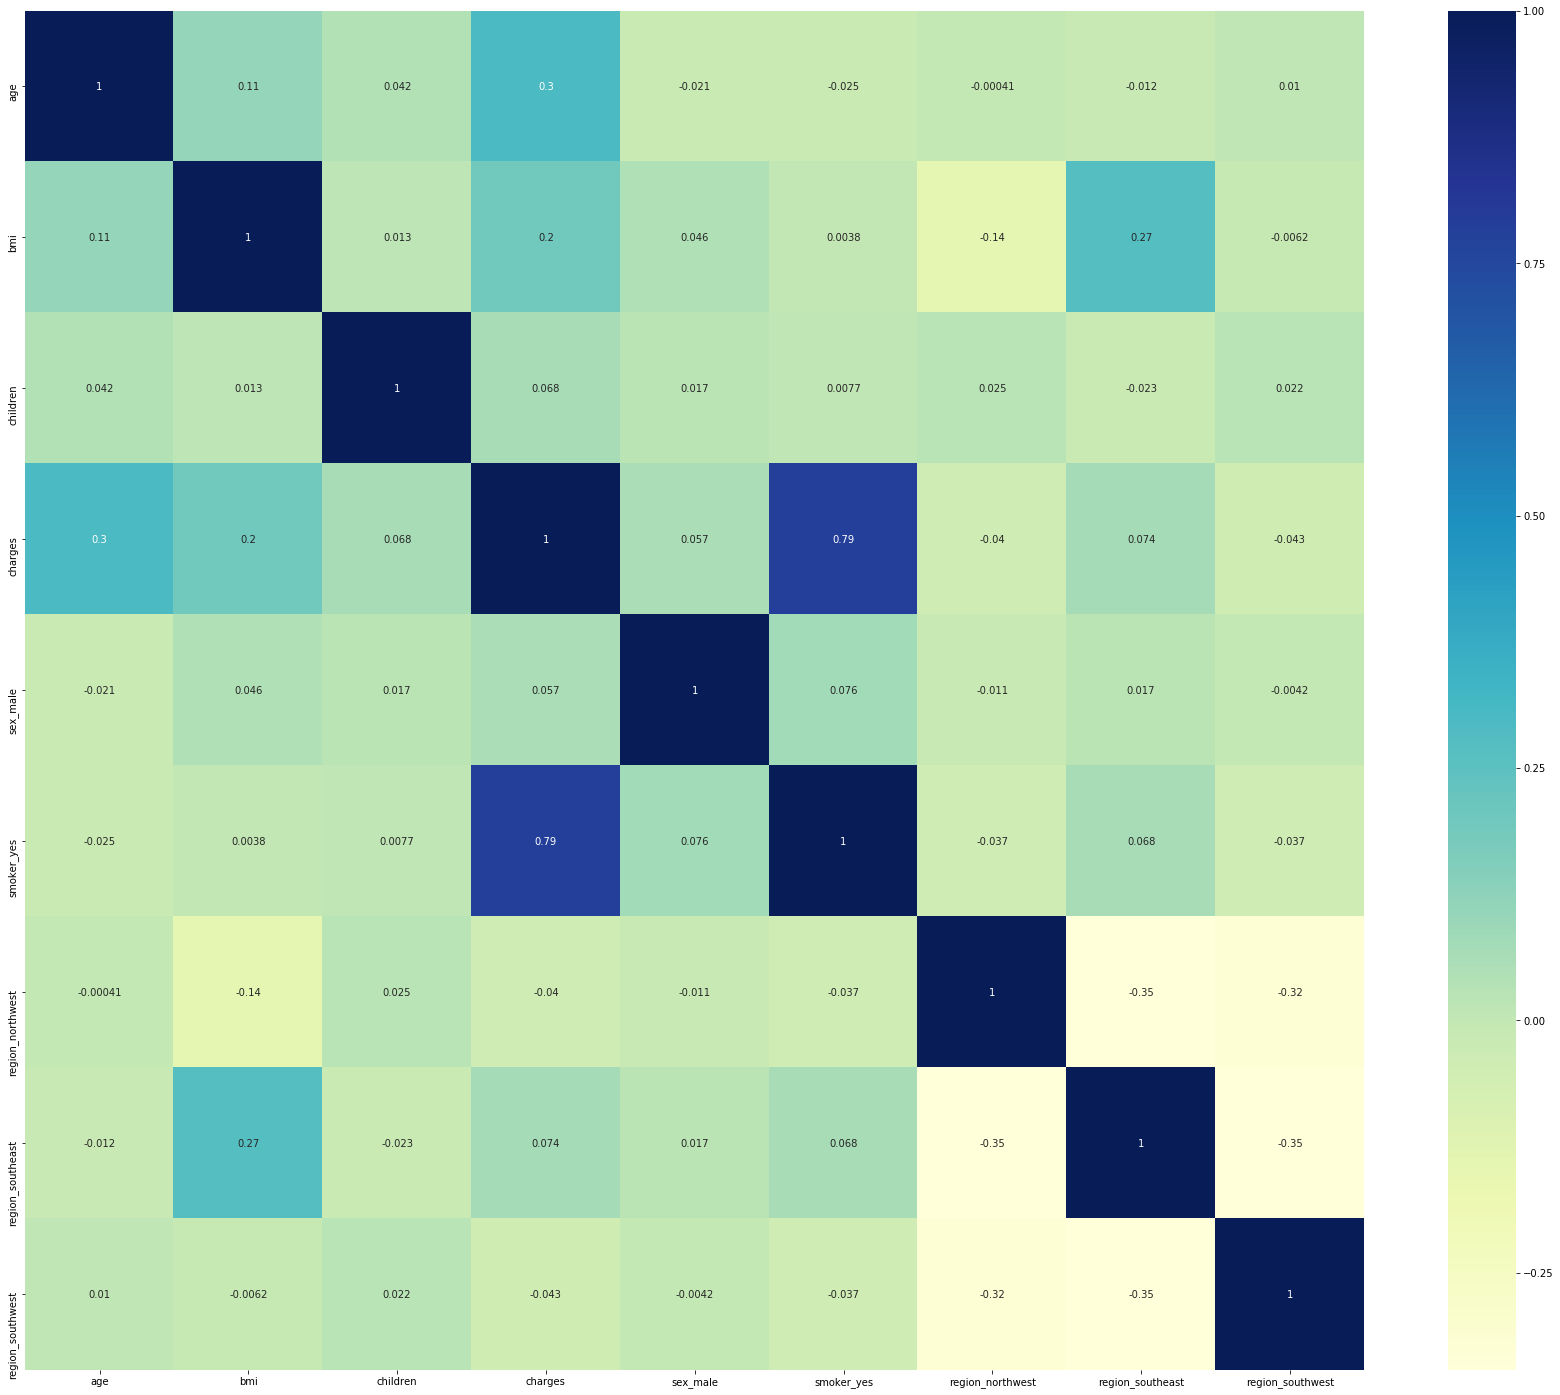

In [40]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [41]:
df.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


In [42]:
print('FEATURES THAT ARE CORELATED WITH CHARGES\nSmoker_yes - 0.78\nage - 0.28\nBmi - 0.19\n\nSmoker is highly co related with charges then Age,Bmi')

FEATURES THAT ARE CORELATED WITH CHARGES
Smoker_yes - 0.78
age - 0.28
Bmi - 0.19

Smoker is highly co related with charges then Age,Bmi


# MODELS

In [43]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def build_model(x,y):
    x = sm.add_constant(x) #Adding the constant
    lm = sm.OLS(y,x).fit() # fitting the model
    print(lm.summary()) # model summary
    return x
def checkVIF(x):
    vif = pd.DataFrame() # expty dataframe
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# Linear Regression Model

MODEL 1

In [44]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xt,yt)
yp = lr.predict(xt)

R2 SCORE OF MODEL

In [45]:
print('R2 SCORE: ',lr.score(xt,yt))

R2 SCORE:  0.7370262574551634


ACTUAL VS PREDICTED VALUES

In [46]:
actual_vs_pred=pd.DataFrame({'ACTUAL':yt,'PREDICTED':yp,'RESIDUALS':(yt-yp)})
actual_vs_pred.head()

,ACTUAL,PREDICTED,RESIDUALS
621,40182.24600,33590.422230,6591.823770
194,1137.46970,3376.992589,-2239.522889
240,38511.62830,30805.631861,7705.996439
1168,4670.64000,8212.641319,-3542.001319
1192,13019.16105,14206.980928,-1187.819878


ADJUSTED R2 

In [47]:
r2=r2_score(yt,yp)
n=xt.shape[0]
p = xt.shape[1]
num = (1-r2)*(n-1)
den = n-p-1
ar2_train = 1 - (num/den)
print('ADJUSTED R2: ',ar2_train)

ADJUSTED R2:  0.7350434205650986


In [48]:
lr_ols=build_model(xt,yt)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     371.7
Date:                Wed, 25 May 2022   Prob (F-statistic):          1.85e-301
Time:                        09:08:50   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1899.4980    675.763  

In [49]:
checkVIF(xt)

,Features,VIF
1,bmi,4.99
0,age,2.88
6,region_southeast,2.18
3,sex_male,1.86
7,region_southwest,1.81
2,children,1.75
5,region_northwest,1.64
4,smoker_yes,1.24


dropping bmi because of high VIF value. (shows that curbweight has high multicollinearity.)

In [50]:
xt_new = xt.drop(["bmi"], axis = 1)

MODEL 2

In [51]:
lr_new = LinearRegression()
lr_new.fit(xt_new,yt)
yp = lr_new.predict(xt_new)
lr_new.score(xt_new,yt)

0.7100921544053553

In [52]:
checkVIF(xt_new)

,Features,VIF
0,age,2.35
2,sex_male,1.77
1,children,1.70
5,region_southeast,1.60
6,region_southwest,1.54
4,region_northwest,1.47
3,smoker_yes,1.23


dropping age because of high VIF value. (shows that curbweight has high multicollinearity.)

In [53]:
xt_new = xt_new.drop(["age"], axis = 1)

In [54]:
lr_new = LinearRegression()
lr_new.fit(xt_new,yt)
yp = lr_new.predict(xt_new)
lr_new.score(xt_new,yt)

0.6097972229285485

In [55]:
checkVIF(xt_new)

,Features,VIF
1,sex_male,1.70
0,children,1.61
4,region_southeast,1.40
5,region_southwest,1.36
3,region_northwest,1.29
2,smoker_yes,1.23


Multi colinearity is eliminated

# RFE

RFE MODEL 1

In [56]:
from sklearn.feature_selection import RFE
fe=RFE(estimator=LinearRegression(), n_features_to_select=3, step=1)
fe.fit(xt,yt)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=3, step=1, verbose=0)

In [57]:
print('Selected features by RFE : ',list(xte.iloc[:,fe.support_].columns))

Selected features by RFE :  ['age', 'bmi', 'smoker_yes']


In [58]:
print('RANKING TABLE')
ranking_table=pd.DataFrame({'Features':xt.columns,'Rank':fe.ranking_})
ranking_table

RANKING TABLE


,Features,Rank
0,age,1
1,bmi,1
2,children,4
3,sex_male,6
4,smoker_yes,1
5,region_northwest,5
6,region_southeast,2
7,region_southwest,3


In [59]:
xtrain_rfe = xt.iloc[ :, fe.support_]
xtest_rfe = xte.loc[ :, fe.support_]

In [60]:
lr_rfe=LinearRegression()
lr_rfe.fit(xtrain_rfe,yt)
ypred=lr_rfe.predict(xtrain_rfe)
print('R2 SCORE (RFE) :',lr_rfe.score(xtest_rfe,yte))

R2 SCORE (RFE) : 0.7945500805653087


In [61]:
lr_ols=build_model(xtest_rfe,yte)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     343.7
Date:                Wed, 25 May 2022   Prob (F-statistic):           7.79e-91
Time:                        09:10:01   Log-Likelihood:                -2697.8
No. Observations:                 268   AIC:                             5404.
Df Residuals:                     264   BIC:                             5418.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1934.8701   1058.868     -1.827      0.0

<BarContainer object of 8 artists>

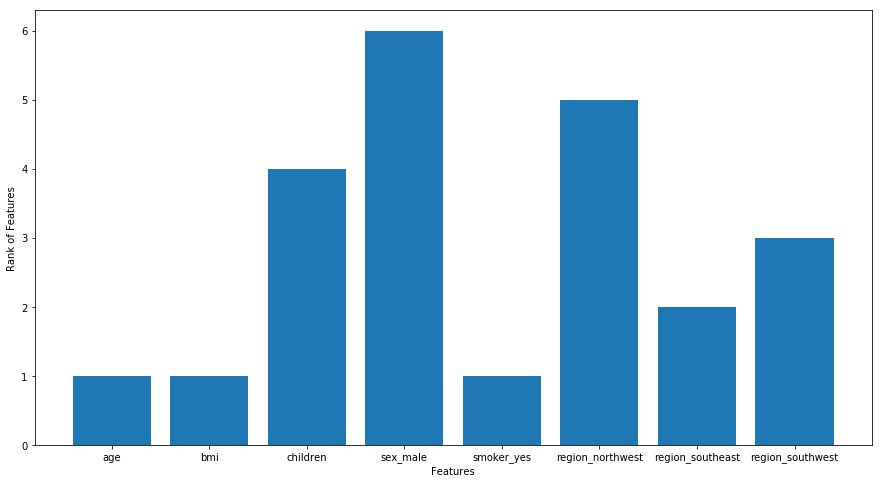

In [62]:
plt.figure(figsize=(15,8))
plt.xlabel('Features')
plt.ylabel('Rank of Features')
plt.bar(xt.columns,fe.ranking_)

RFE model 2

In [63]:
from sklearn.feature_selection import RFE
fe_new=RFE(estimator=LinearRegression(), n_features_to_select=1, step=1)
fe_new.fit(xt,yt)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=1, step=1, verbose=0)

In [64]:
print('Selected features by new RFE : ',list(xte.iloc[:,fe_new.support_].columns))

Selected features by new RFE :  ['smoker_yes']


In [65]:
print('RANKING TABLE')
ranking_table=pd.DataFrame({'Features':xt.columns,'Rank':fe_new.ranking_})
ranking_table

RANKING TABLE


,Features,Rank
0,age,3
1,bmi,2
2,children,6
3,sex_male,8
4,smoker_yes,1
5,region_northwest,7
6,region_southeast,4
7,region_southwest,5


In [66]:
print('As we can see\nsmoker rank is 1\nage rank is 2\nbmi rank is 3\n \nRFE has given 1st priority to smoker feature') 

As we can see
smoker rank is 1
age rank is 2
bmi rank is 3
 
RFE has given 1st priority to smoker feature


In [67]:
xtrain_rfe_new = xt.iloc[ :, fe_new.support_]
xtest_rfe_new = xte.loc[ :, fe_new.support_]

In [68]:
lr_ols=build_model(xtest_rfe_new,yte)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     569.7
Date:                Wed, 25 May 2022   Prob (F-statistic):           4.45e-68
Time:                        09:10:53   Log-Likelihood:                -2757.5
No. Observations:                 268   AIC:                             5519.
Df Residuals:                     266   BIC:                             5526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8254.3155    489.474     16.864      0.0

# RFECV

In [364]:
from sklearn.feature_selection import RFECV
fea=RFECV(estimator=LinearRegression(), min_features_to_select=1, step=1, n_jobs=-1, scoring="r2", cv=5)
fea.fit(xt,yt)

0.753233665085972

In [367]:
print('Selected features by RFE : ',list(xte.iloc[:,fea.support_].columns))

Selected features by RFE :  ['age', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [368]:
print('RANKING TABLE')
ranking_table=pd.DataFrame({'Features':xt.columns,'Rank':fea.ranking_})
ranking_table

RANKING TABLE


,Features,Rank
0,age,1
1,bmi,1
2,children,1
3,sex_male,2
4,smoker_yes,1
5,region_northwest,1
6,region_southeast,1
7,region_southwest,1


In [372]:
xtrain_rfecv = xt.iloc[ :, fea.support_]
xtest_rfecv = xte.iloc[ :, fea.support_]

In [375]:
lr_rfecv=LinearRegression()
lr_rfecv.fit(xtrain_rfecv,yt)
print('R2 SCORE (RFE) :',lr_rfecv.score(xtrain_rfecv,yt))

R2 SCORE (RFE) : 0.7487886596863429


In [378]:
lr_ols=build_model(xtest_rfecv,yte)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     123.1
Date:                Tue, 24 May 2022   Prob (F-statistic):           9.27e-79
Time:                        13:52:51   Log-Likelihood:                -2722.5
No. Observations:                 268   AIC:                             5461.
Df Residuals:                     260   BIC:                             5490.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3834.1363   1231.879  

CONCLUSION:
    
Mainly 3 features influencing the medical insurance charges

Smoker, age , BMI 

Smoker influencing insurance price the most 

Then age , BMI resp.

accracy score was 79% with age,smoker, bmi features

# RESIDUAL ANALYSIS

Text(0.5, 0, 'Errors')

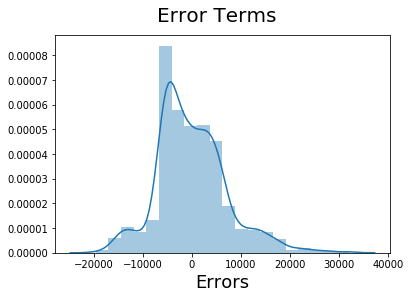

In [437]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((yt - yp), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed 
so the assumption on the linear modeling seems to be fulfilled.

# EVALUATION OF THE MODEL, Plotting y_test and y_pred to understand the spread.

Text(0, 0.5, 'y_pred')

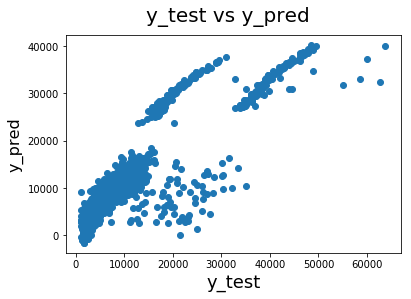

In [398]:
fig = plt.figure()
plt.scatter(yt,yp)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)